<section id="title-slide">
  <h1 class="title">The ABC of Computational Text Analysis</h1>
  <h2 class="subtitle">#08: Data Analysis of Swiss Media</h2>
  <p class="author">Alex Flückiger</p><p class="date">18 April 2024</p>
</section>

## Update the course material
1. Navigate to the course folde using `cd` in your command line
2. Update the files with `git pull`
3. If `git pull` doesn't work due to file conflicts, run `git restore .` first

## Getting started 
1. Open VS Code
2. Windows: Make sure that you are connected to WSL (green-badge in left-lower corner)
3. Open the `KED2024` folder via the menu: `File` > `Open Folder`
4. Navigate to `KED2024/ked2024/materials/code/KED2024_08.ipynb` and open with double-click
5. Run the code with `Run all` via the top menu

## Curate a Dataset on Wokeness in Swiss Media

The dataset is based on the following criteria:
- article contains the word `woke` (topic: wokeness)
- published by NZZ or Tages-Anzeiger
- published between 2000-2022

Download and extract `.xz`-compressed dataset to get a `.tsv`

![Query on Swissdox!](../../lectures/images/swissdox_woke.png)

## Modules
#### Standing on the shoulders of giants
- [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html): analyze tabular data 
- [plotnine](https://plotnine.readthedocs.io): visualize anything (*ggplot for Python*)
- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#): extract data from HTML and XML files

# Importing modules

various ways of importing

In [31]:
import pandas as pd
from bs4 import BeautifulSoup
import plotnine as pn

## Load dataset

In [32]:
# url to dataset stored in the GitHub project repository for easy online access
# path_to_dataset = "https://raw.githubusercontent.com/aflueckiger/KED2023/main/KED2023/materials/data/swiss_media_wokeness.tsv"

# when you have cloned the repository, you can also load the dataset from there
path_to_dataset = "../data/swiss_media_wokeness.tsv"

# load dataset
df = pd.read_csv(path_to_dataset, sep="\t")

# show the 3 first lines of the dataset
df.head(3)


,id,pubtime,medium_code,medium_name,rubric,regional,doctype,doctype_description,language,char_count,dateline,head,subhead,content_id,content
0,39835818,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,NaN,PND,National daily newspaper,de,3785,NaN,Mobbing im Zeichen des «Guten»,NaN,00961432-028a-ca23-6f60-f079f2d7c048,<tx><ld><p>Aus Angst vor Reputationsschäden re...
1,42536108,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,NaN,PND,National daily newspaper,de,12305,NaN,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,013e9093-5b0e-5356-d240-c9addcbfb8fc,"<tx><au>Claudia Mäder</au><p>Herr Bruckner, wa..."
2,31895707,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,NaN,PND,National daily newspaper,de,7883,NaN,Der Hass der Wohlgesinnten,NaN,03659813-b0f6-591a-855c-4f6964091cab,"<tx><ld><p>Rate mal, wer zum Essen kommt: Die ..."


## Get meta-information of a dataset

In [33]:
# show the dateset's shape (rows x columns)
df.shape


(152, 15)

In [34]:
# get general information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   152 non-null    int64 
 1   pubtime              152 non-null    object
 2   medium_code          152 non-null    object
 3   medium_name          152 non-null    object
 4   rubric               149 non-null    object
 5   regional             4 non-null      object
 6   doctype              152 non-null    object
 7   doctype_description  152 non-null    object
 8   language             152 non-null    object
 9   char_count           152 non-null    int64 
 10  dateline             19 non-null     object
 11  head                 152 non-null    object
 12  subhead              88 non-null     object
 13  content_id           152 non-null    object
 14  content              152 non-null    object
dtypes: int64(2), object(13)
memory usage: 17.9+ KB


## Remove irrelevant data

In [38]:
# define a list of irrelevant columns
columns_to_drop = [
    "id",
    "regional",
    "doctype",
    "doctype_description",
    "dateline",
    "content_id",
]
# remove these columns and save resulting dataset into a new variable 
df_sub = df.drop(columns=columns_to_drop)

df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,de,3785,Mobbing im Zeichen des «Guten»,NaN,<tx><ld><p>Aus Angst vor Reputationsschäden re...
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,de,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"<tx><au>Claudia Mäder</au><p>Herr Bruckner, wa..."
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,de,7883,Der Hass der Wohlgesinnten,NaN,"<tx><ld><p>Rate mal, wer zum Essen kommt: Die ..."


## Get statistics for numerical columns

In [39]:
# Get descriptive stats for each numerical column
df_sub.describe()


,char_count
count,152.00000
mean,7420.75000
std,3650.99805
min,343.00000
25%,4592.75000
50%,7063.00000
75%,9533.50000
max,20971.00000


## Count articles per...

In [40]:
# number of articles per newspaper
df_sub["medium_name"].value_counts()

medium_name
Neue Zürcher Zeitung    103
Tages-Anzeiger           49
Name: count, dtype: int64

In [41]:
# number of articles per rubric (limited to 10 most frequent)
df_sub["rubric"].value_counts()[:10]

rubric
Feuilleton               46
Kultur & Gesellschaft    18
International            16
Meinung und Debatte      15
Medien                    7
Schweiz                   7
Front                     5
Meinungen                 4
Wirtschaft                4
Hintergrund               4
Name: count, dtype: int64

## Visualize absolute frequency as bar plot

<Axes: title={'center': 'Number of articles per category'}, xlabel='rubric'>

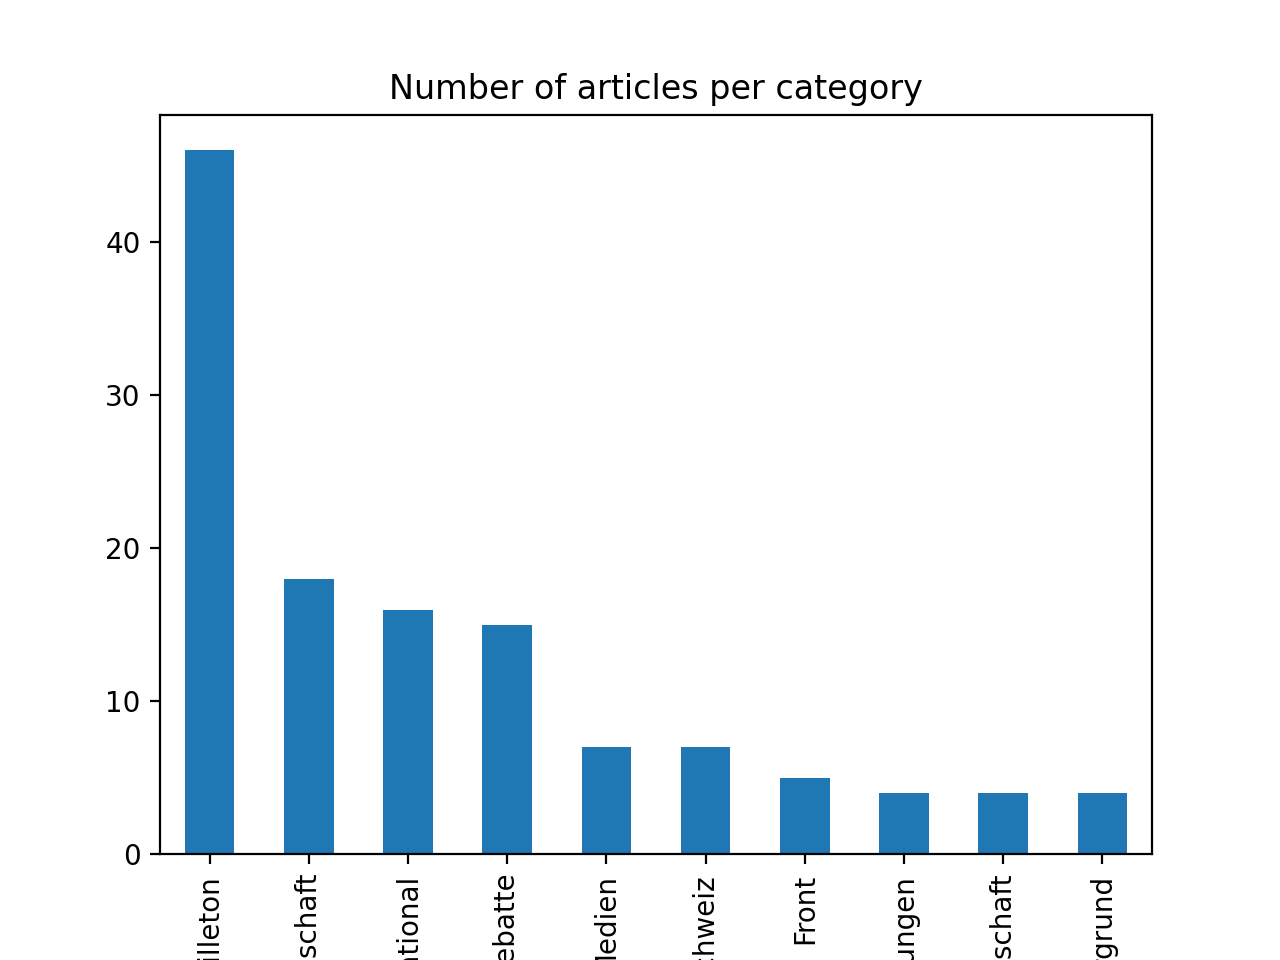

In [42]:
# visualize the number of articles per rubric as bar plot (same numbers as before)
# limit to the 10 most frequent rubrics
df_sub["rubric"].value_counts()[:10].plot(
    kind="bar", title="Number of articles per category"
)


## Visualize relative frequency as bar plot

<Axes: title={'center': 'Relative frequency of articles per category'}, xlabel='rubric'>

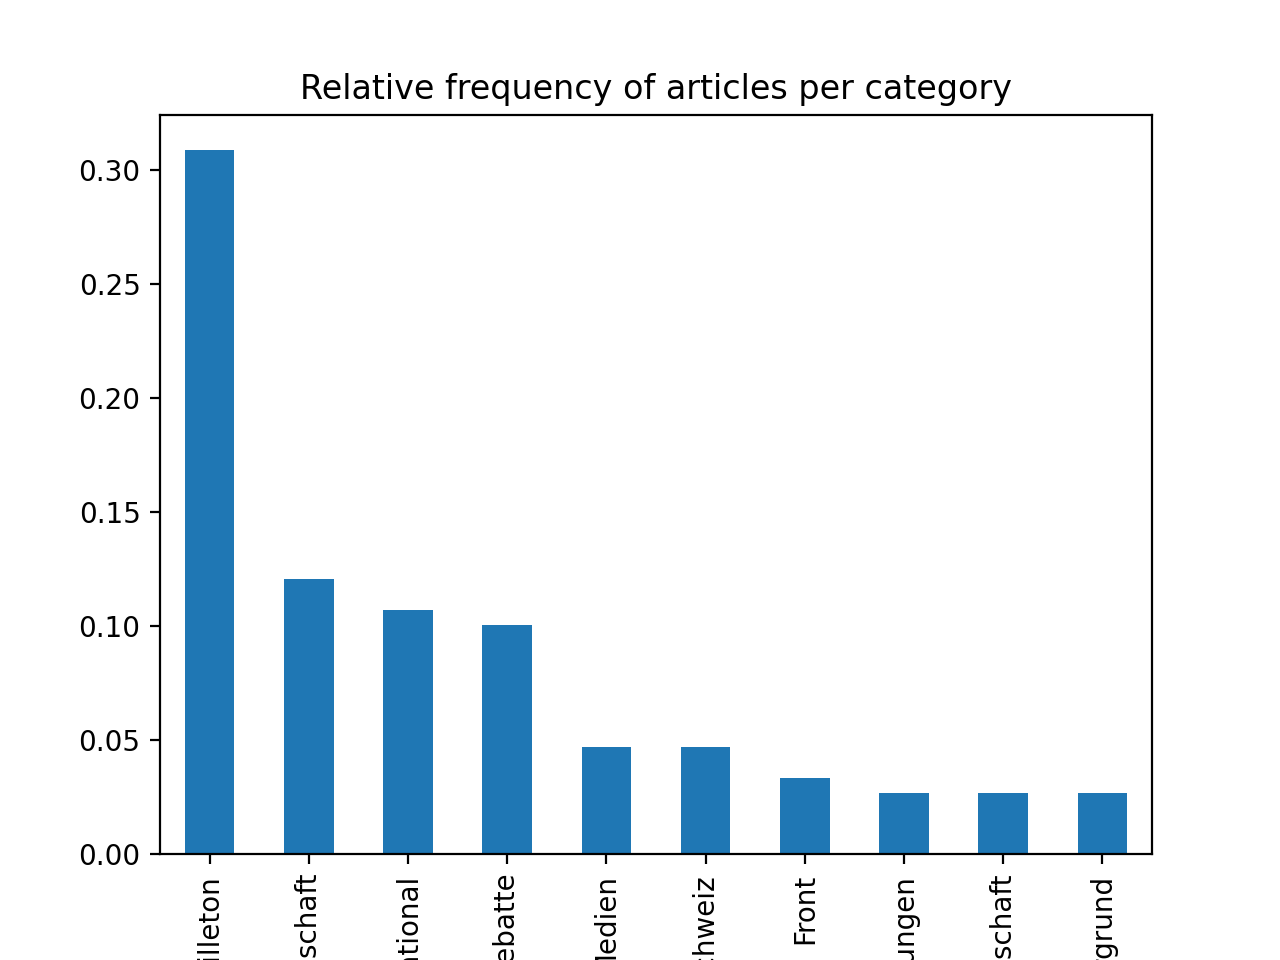

In [43]:
# visualize the relative frequency of articles per rubric (i.e., normalizing the absolute numbers)
df_sub["rubric"].value_counts(normalize=True)[:10].plot(
    kind="bar", title="Relative frequency of articles per category"
)


## Sanity check textual content

In [44]:
# unfortunately, the document content is not pure and contains HTML-tags
# we want to remove these elemnents (e.g. <tx><au><p>)
df_sub["content"][0]


'<tx><ld><p>Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.</p></ld><p><au>Michèle Binswanger</au></p><p>Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.</p><p>Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross

In [ ]:
# get a random sample of document content
df_sub["content"].sample(n=5)

# Data is a dirty business
![Clean your data](../../lectures/images/clean_data.png)

## Clean a single document using BeautifulSoup


In [45]:
# assign the first document to a new variable
html_doc = df_sub["content"][0]

# create beautiful soup object for easy clean-up
soup = BeautifulSoup(html_doc)

# remove the authors name in the tag, e.g. <au>AUTHORNAME</au>
soup.au.decompose()

# strip the remaining tags and join the strings by newline
text = soup.get_text(separator="\n", strip=True)

# show the cleaned document
print(text)


Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.
Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.
Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross. Wer ausschert, macht sich zum Ziel und riskiert eine Diffamie

## Clean all documents in the dataset

In [46]:
def remove_html_tags(text):
    # create beautiful soup object for easy clean-up
    soup = BeautifulSoup(text)

    try:
        # remove the authors name in the tag, e.g. <au>AUTHORNAME</au>
        soup.au.decompose()
    except AttributeError:
        # in some of the articles, there is no <au>AUTHORNAME</au>
        # thus, we want to catch the error and just by-pass the raised error
        pass

    # strip the remaining tags and join the strings by newline
    text = soup.get_text(separator="\n", strip=True)

    return text


# Call the function remove_html_tags for each cell in the column `content`
df_sub["content"] = df_sub["content"].apply(lambda x: remove_html_tags(x))

# Check the first document after cleaning
print(df_sub["content"][0])


Aus Angst vor Reputationsschäden reagieren Firmen oft kopflos, wenn sie einen Shitstorm befürchten. Doch das kann sich rächen.
Die sozialen Medien waren dazu gedacht, die Meinungsäusserungsfreiheit zu fördern. Stattdessen bedrohen sie sie mittlerweile. Das zeigte sich vergangenes Wochenende. Kaum 24 Stunden nachdem sich ein Shitstorm gegen Influencerin Mimi Jäger erhoben hatte, zeigten sich einige ihrer Auftraggeber auf Twitter «bestürzt» (die Post), bekannten sich zu «Diversität und Vielfalt» (Philips) und gelobten, künftig nicht mehr mit Jäger zusammenzuarbeiten. Auffällig an diesen Bekenntnissen ist, wie reflexartig sie erfolgten und wie identisch sie in der Wortwahl sind. Ganz so, als zitiere man aus einem Handbuch. Und keiner machte sich die Mühe, zu überprüfen, was an den Anschuldigungen gegen Jäger eigentlich dran war. Nämlich herzlich wenig.
Wir leben in politisch aufgeladenen Zeiten, der Konformitätsdruck ist gross. Wer ausschert, macht sich zum Ziel und riskiert eine Diffamie

## Exlclude missing data
There is some missing data indicated by NaN, which may bias your results. 
See also [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?highlight=nan/).

In [47]:
# Check missing data in each column
df_sub.isna().sum()


pubtime         0
medium_code     0
medium_name     0
rubric          3
language        0
char_count      0
head            0
subhead        64
content         0
dtype: int64

In [ ]:
# Filter articles where the rubric information is missing
df_filter = df_sub[df_sub["rubric"].isna() == False]
df_filter.shape


## Recode categorial variables
Sometimes you want to change a category name to improve consistency or readability 

In [48]:
# Recode variable `language`from `de`to `German``
df_sub.replace(
    {
        "language": {"de": "German"},
    },
    inplace=True, # change directly in dataset
)
df_sub.head(3)

,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ..."
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd..."


## Search for relevant articles using regex

In [49]:
# select all rows for which the regular expression matches the article content
# the regex defines a pattern to match either `Theather` or `Aufführung`
df_theater = df_sub[df_sub["content"].str.contains("(?:Theater|Aufführung)")]
df_theater.head(3)

,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content
19,2022-10-12 00:00:00+02,NZZ,Neue Zürcher Zeitung,Zürich und Region,German,5977,Kritik am Diversity-Kurs des Schauspielhauses,Der Stadtrat muss über die wirtschaftlichen Ko...,Dem Zürcher Schauspielhaus laufen die Zuschaue...
22,2022-12-27 00:00:00+01,NZZ,Neue Zürcher Zeitung,Meinung und Debatte,German,9484,Böse alte Welt,«Woke» Westler werfen früheren Gesellschaften ...,Der Abenteuerfilm «The Aeronauts» aus dem Jahr...
33,2022-11-05 00:00:00+01,NZZ,Neue Zürcher Zeitung,Front,German,1349,Schauspielhaus Zürich erregt Kritik,Die Abo-Zahlen des Theaters gehen stark zurück,· Am meisten zu reden gibt das Schauspielhaus ...


## Show single articles using index

In [50]:
# show text of the article with the index number 19
# the column with the text is called `content`
print(df_sub.iloc[19].content)


Dem Zürcher Schauspielhaus laufen die Zuschauer davon: Nur 72 Prozent aller Abonnements wurden auf die laufende Spielzeit hin erneuert, wie die «NZZ am Sonntag» jüngst berichtete. Von 2013 bis 2019 lag diese Quote jeweils bei über 95 Prozent. Woher kommt dieser Rückgang? Eine mögliche Erklärung ist Corona, allerdings weisen andere Institutionen wie das Opernhaus oder die Berner Theater auch nach der Pandemie weiterhin gute Zahlen auf, wie die Recherche zeigte.
Fakt ist: Das Theater hat sich unter der Leitung der Intendanten Nicolas Stemann und Benjamin von Blomberg nach eigenen Angaben ganz der Diversität verschrieben. Dazu heisst es auf der Website: «Das Schauspielhaus verfolgt einen spartenübergreifenden, transdisziplinären, inklusiven und intersektionalen Ansatz, der sowohl bei den Mitarbeiter*innen wie auch beim Publikum grösstmögliche Diversität hinsichtlich Alter, Gender, race und Herkunft sowie anderen Kategorien systemischer Diskriminierung anstrebt.»
«Stroboskope werden einges

## Analyze the article length

In [51]:
# Recompute article length rather than relying on `char_count`
df_sub["length"] = df_sub["content"].str.len()
df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content,length
0,2020-06-18 00:00:00+02,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...,3608
1,2021-04-16 00:00:00+02,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ...",12056
2,2017-05-06 00:00:00+02,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd...",7417


<Axes: title={'center': 'Distribution of article length'}, ylabel='Frequency'>

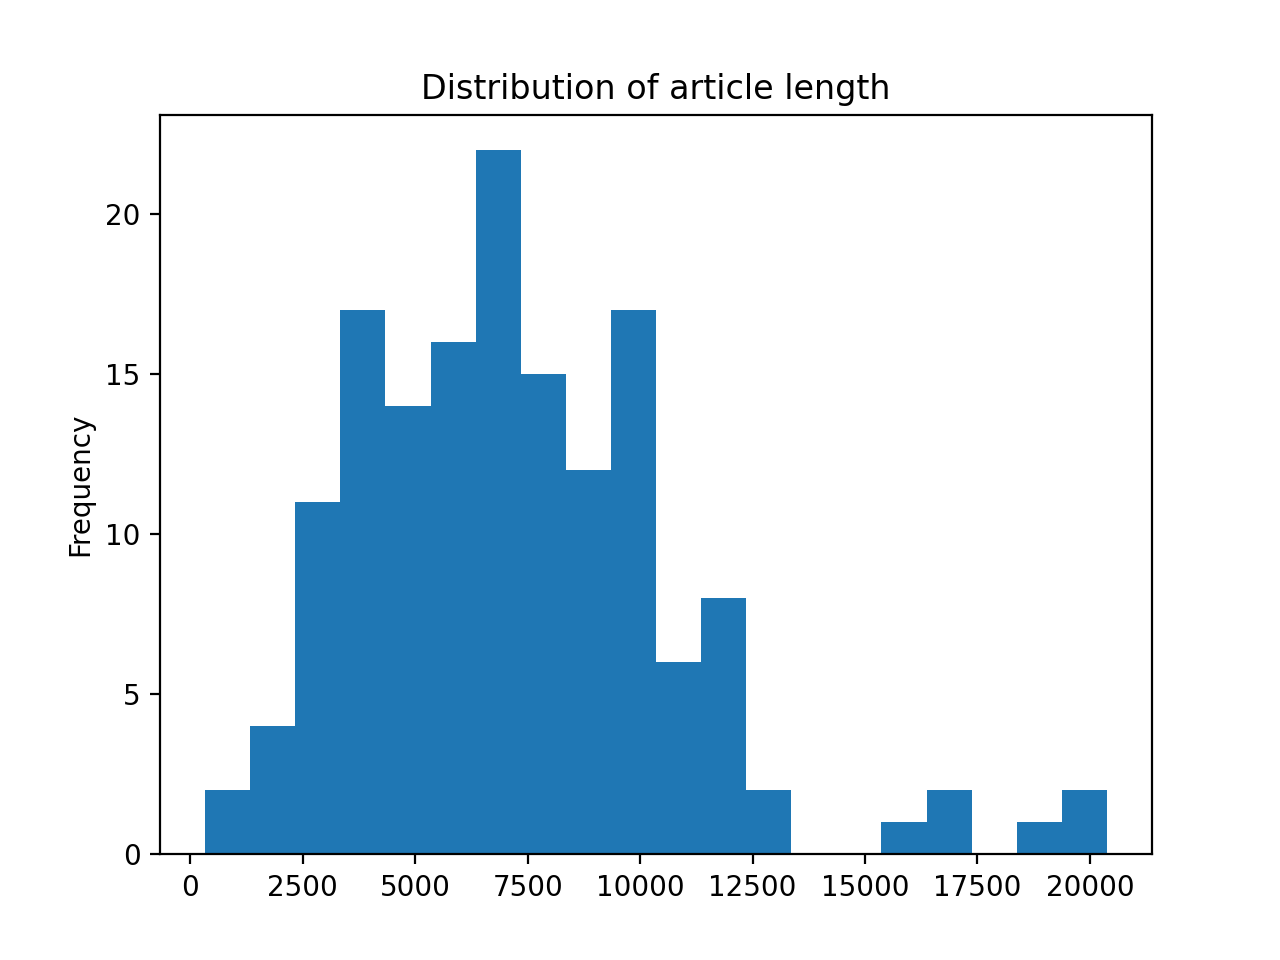

In [52]:
# visualize distribution of article length as histogram
df_sub["length"].plot(kind="hist", bins=20, title="Distribution of article length")


## Analyze the publishing cycle

- publishing frequency on wokeness over time
- broken down by newspaper

In [53]:
# Parse the `pubtime` as datetype (accounting for timezones)
df_sub["pubtime"] = pd.to_datetime(df_sub["pubtime"], utc=True)

# create new column with publication year only
df_sub["year"] = df_sub["pubtime"].dt.year
df_sub.head(3)


,pubtime,medium_code,medium_name,rubric,language,char_count,head,subhead,content,length,year
0,2020-06-17 22:00:00+00:00,TA,Tages-Anzeiger,Meinungen,German,3785,Mobbing im Zeichen des «Guten»,NaN,Aus Angst vor Reputationsschäden reagieren Fir...,3608,2020
1,2021-04-15 22:00:00+00:00,NZZ,Neue Zürcher Zeitung,Feuilleton,German,12305,«Foucault lachte über Pädophilie»,Hat Michel Foucault Buben missbraucht? Von die...,"Herr Bruckner, was ging Ihnen durch den Kopf, ...",12056,2021
2,2017-05-05 22:00:00+00:00,TA,Tages-Anzeiger,Wochenende Kultur & Gesellschaft,German,7883,Der Hass der Wohlgesinnten,NaN,"Rate mal, wer zum Essen kommt: Die Horrorkomöd...",7417,2017


In [54]:
# Group data by year and newspaper and count the respective articles
docs_per_year = (
    df_sub.groupby(["year", "medium_name"])
    .agg({"content": "count"})
    .reset_index()
    .rename(columns={"content": "count"})
)
docs_per_year


,year,medium_name,count
0,2000,Tages-Anzeiger,1
1,2001,Neue Zürcher Zeitung,1
2,2001,Tages-Anzeiger,2
3,2004,Neue Zürcher Zeitung,1
4,2004,Tages-Anzeiger,1
5,2007,Tages-Anzeiger,1
6,2013,Tages-Anzeiger,1
7,2017,Tages-Anzeiger,2
8,2018,Neue Zürcher Zeitung,1
9,2019,Neue Zürcher Zeitung,3


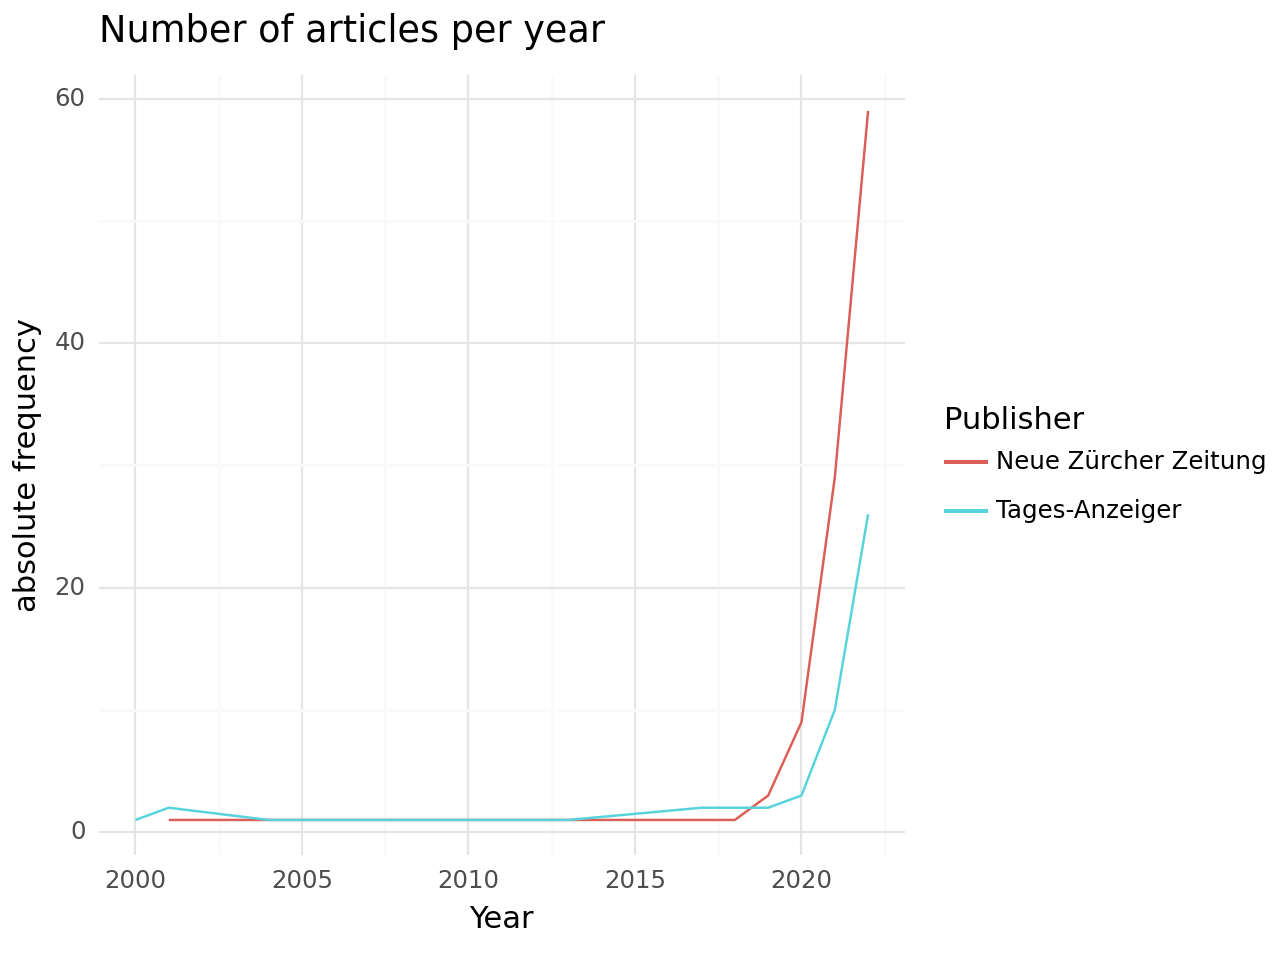

<Figure Size: (640 x 480)>

In [55]:
# visualize the number of articles per year and newspaper
# for more complex figures, we use plotnine instead of standard visualization of pandas
(
    pn.ggplot(docs_per_year, pn.aes(x="year", y="count", color="medium_name"))
    + pn.geom_line()
    + pn.labs(title="Number of articles per year", x="Year", y="absolute frequency",  color="Publisher")
    + pn.theme_minimal()
)


## Key aspects of publishing on wokeness
- wokeness is a recent topic in Swiss Media
  - starts in 2013
  - skyrockets after 2020 
- NZZ becomes obsessed with the topic in 2022

## Export the modified dataset as CSV

In [56]:
# Save dataset as CSV file without an index
df_sub.to_csv("extended_swiss_media_wokeness.tsv", index=False)


# In-class: Exercises I

1. Execute the code in this Jupyter Notebook by clicking "Run All". Check the code and the outputs below each cell.
2. Combine a few words of your interest into a singular regular expression and search for all occurrences.
3. Use the `id` of the row to look at the articles content.
4. Rename the column from `medium_name` to `publisher`.


# In-class: Exercises II
1. Visualize the articles rubric over time instead of the newspaper
2. Some articles have still some meta information in their text. Remove the last line of articles if it doesn't end like a regular sentence  (e.g. `Gaëtan Bally / Keystone`). Use regular expressions.


# In-class: Exercises III
1. Choose a topic of your interest and curate your own dataset on Swissdox by using relevant keywords
2. How do different keywords infuence your results? Try to make your results more robust by combining keywords with bool operators (`AND`, `OR`, `NOT`). See also the [manual](https://liri.linguistik.uzh.ch/wiki/langtech/swissdox/query).

# Resources
Learn more about data analysis using Pandas
- [Explaratory data analysis on UN General Debate](https://www.oreilly.com/library/view/blueprints-for-text/9781492074076/ch01.html)
- [Introduction to Pandas for Social Scientists](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/00-Data-Analysis.html)

# Solutions

In [ ]:
# task II.1
# visualize the number of articles per year and rubric
docs_per_year = (
    df_sub.groupby(["year", "rubric"])
    .agg({"content": "count"})
    .reset_index()
    .rename(columns={"content": "count"})
)

(
    pn.ggplot(docs_per_year, pn.aes(x="year", y="count", color="rubric"))
    + pn.geom_line()
    + pn.labs(title="Number of articles per year", x="Year", y="absolute frequency")
    + pn.theme_minimal()
)
